In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import *
import pandas as pd

In [2]:
Xy=np.loadtxt('data3.csv',delimiter=',')

In [3]:
len(Xy)

320

In [4]:
X=Xy[:,0:-1].copy()
y=Xy[:,-1]

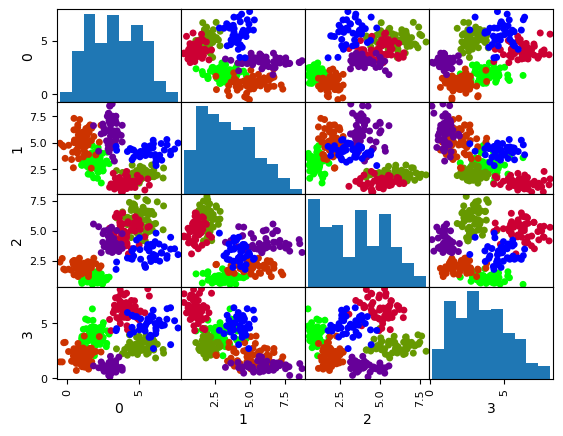

In [5]:
p1=pd.plotting.scatter_matrix(
    pd.DataFrame(X),c=y,s=100,cmap='brg_r',alpha=1)

In [6]:
nb1=sk.naive_bayes.GaussianNB()

In [7]:
XT,Xt,yT,yt=sk.model_selection.train_test_split(
    X,y,test_size=0.3,random_state=0)


In [8]:
nb1.fit(XT,yT)

GaussianNB()

In [9]:
yp=nb1.predict(Xt)

In [10]:
(yp==yt).sum()/len(yt)

0.9895833333333334

In [11]:
groups=np.unique(y)
groups

array([0., 1., 2., 3., 4., 5.])

In [12]:
nk=len(groups)
nk

6

In [13]:

def fit(x,y):
    nj=x.shape[1]
    p=np.zeros(nk)
    mu=np.zeros((nk,nj))
    var=np.zeros((nk,nj))
    for k,c in enumerate(groups):
        xc=x[y==c]
        p[k]=len(xc)/len(x)
        mu[k]=xc.mean(axis=0)
        var[k]=xc.var(axis=0)
    return p,mu,np.maximum(var,1e-6)





In [14]:
p,mu,var=fit(XT,yT)

In [15]:
p

array([0.18303571, 0.19196429, 0.16517857, 0.16964286, 0.14732143,
       0.14285714])

In [16]:
mu

array([[1.87956341, 3.05782927, 1.02306585, 4.00867561],
       [5.13981163, 2.02926512, 6.00662093, 3.00615349],
       [0.99413243, 4.96403243, 1.9971    , 2.01138919],
       [4.05396842, 1.15347632, 4.9962    , 6.18891842],
       [3.00638788, 5.99072424, 4.06018788, 1.05327576],
       [5.60931875, 4.08953125, 3.20625625, 4.70751875]])

In [17]:
var

array([[0.21233723, 0.32342082, 0.04531446, 0.44151032],
       [0.47272047, 0.13200185, 0.62925579, 0.27635297],
       [0.38915928, 1.28256264, 0.1557255 , 0.43997074],
       [0.3782522 , 0.19206398, 0.60399744, 0.93637771],
       [0.18618568, 1.22756755, 0.3647318 , 0.13141171],
       [1.06481031, 0.29876155, 0.54157408, 0.63762599]])

In [18]:
def logpdf(x):
    nt=len(x)
    lnpdf=np.zeros((nt,nk))
    for i in range(nt):
        lnpdf_i=-0.5*(np.log(var)+(x[i]-mu)**2/var).sum(axis=1)
        lnpdf[i]=np.log(p)+lnpdf_i

    return lnpdf



In [19]:
yp=np.argmax(logpdf(Xt),axis=1)
(yp==yt).sum()/len(yt)

0.9895833333333334